# Task 1:

In [64]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

from tqdm import tqdm_notebook

mnist = input_data.read_data_sets("data/fashion", one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


test accuracy is : 0.8323
test cost is : 4967.87


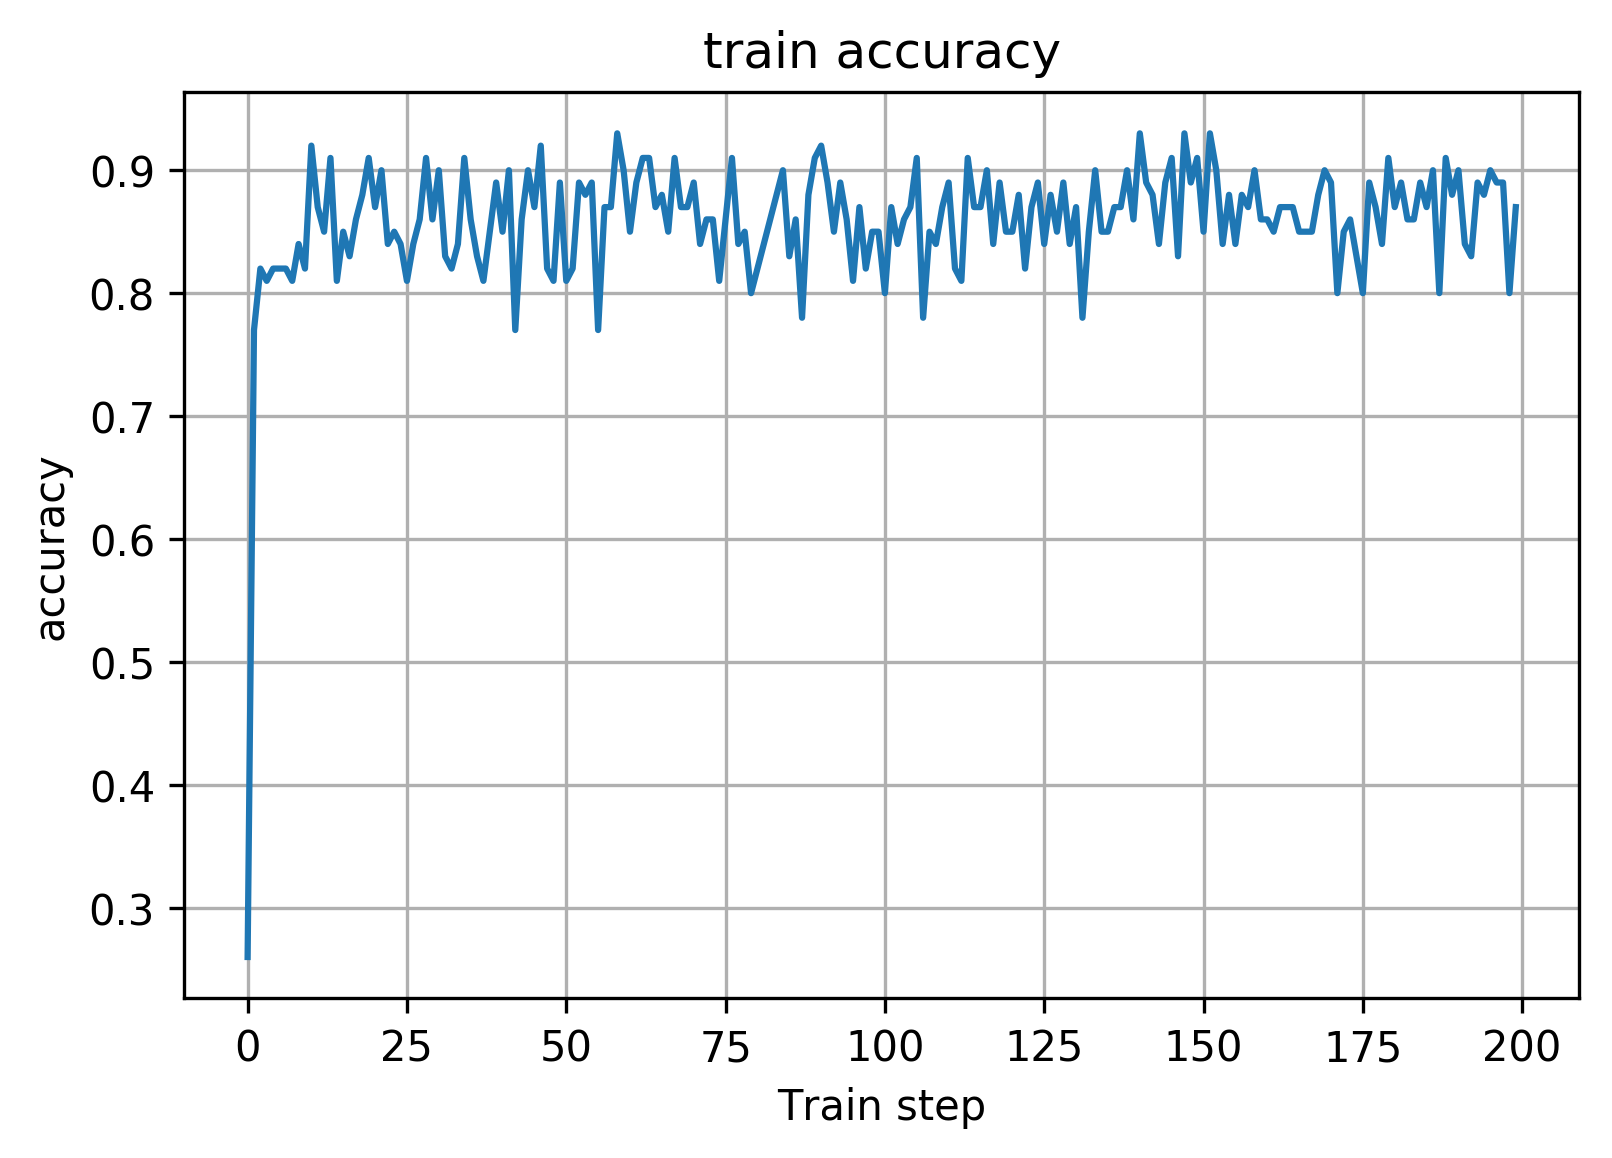

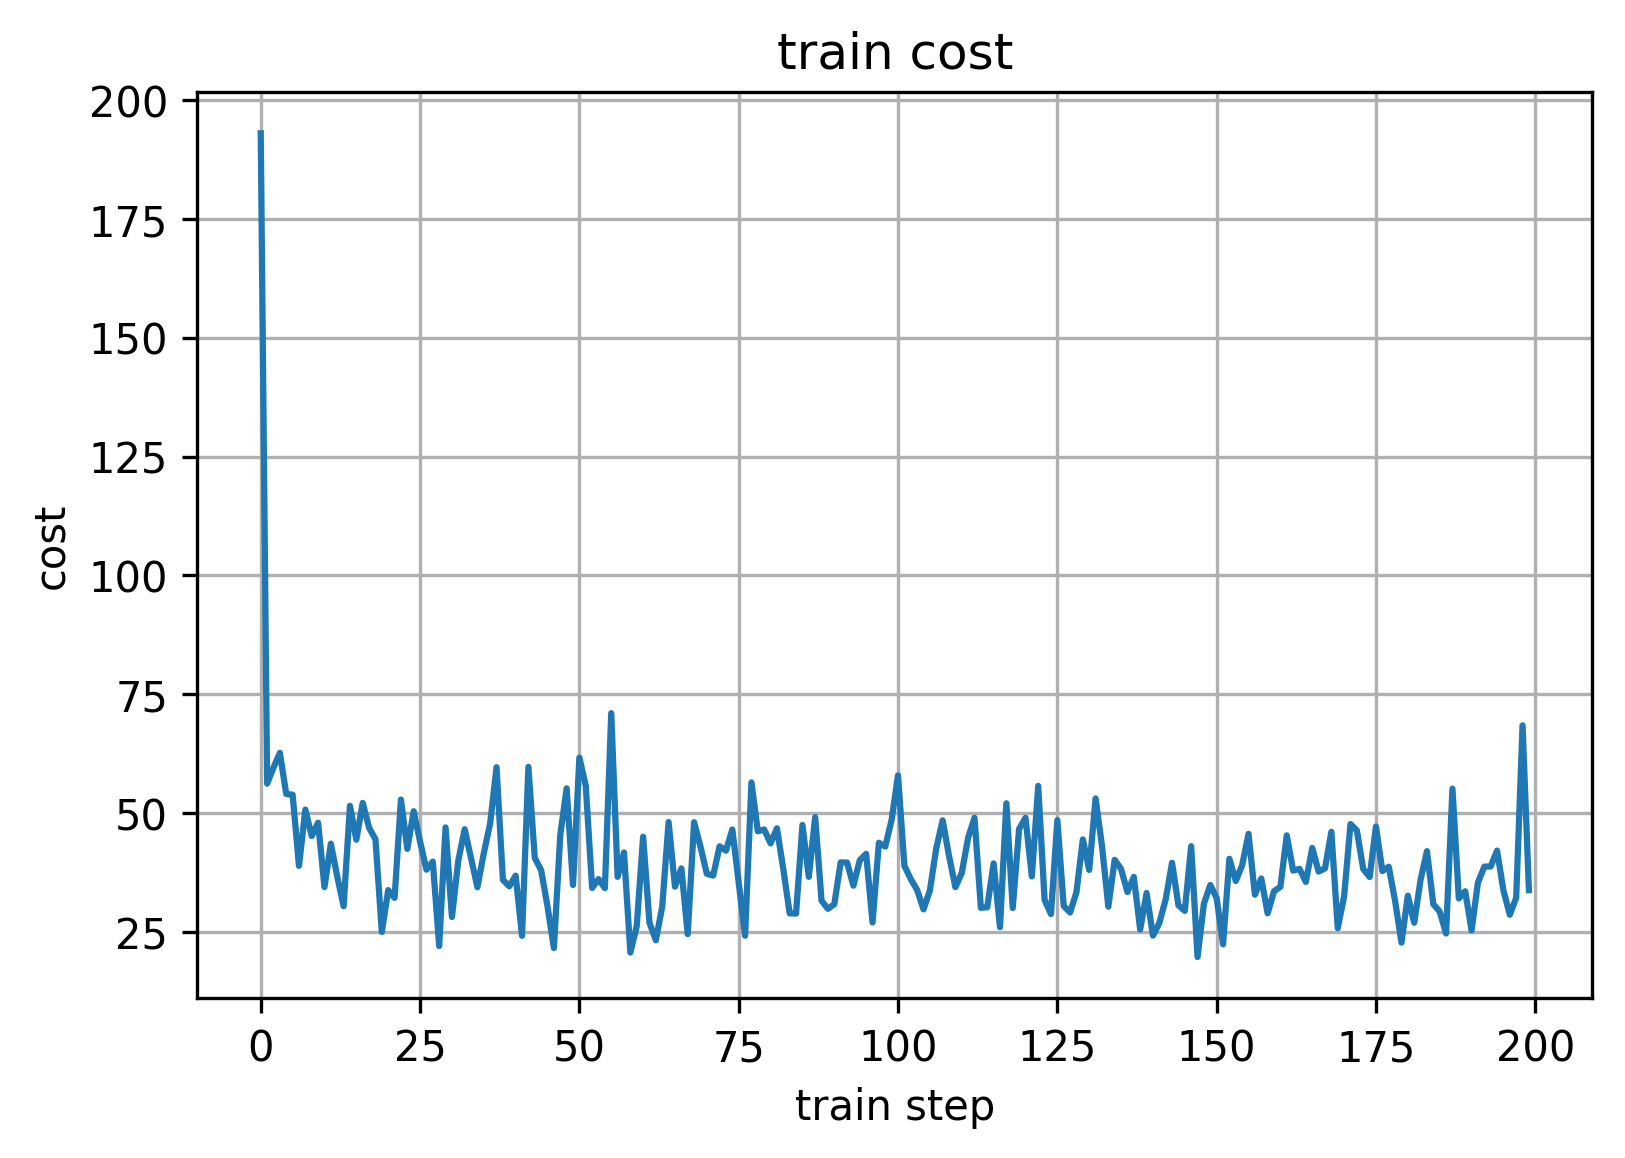

In [30]:
# parameters
learningRate = 0.05
adamLearningRate = 0.005

# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])
# 2. Define the model
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

X = X / 255.0 - 0.5
# XX = tf.reshape(X,[-1,784])
Y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

# 3. Define the loss function  
cross_entropy = -tf.reduce_sum(Y*tf.log(Y_ + 1e-10))
# cross_entropy = tf.train.cross_entropy(Y, Y_)

# 4. Define the accuracy 
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# 5. Define an optimizer
# optimizer = tf.train.GradientDescentOptimizer(learningRate)
optimizer = tf.train.AdamOptimizer(adamLearningRate) #Errors TODO
train_step = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
def training_step(i, update_train_data):

    ####### actual learning 
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y: batch_Y})
        train_a.append(a)
        train_c.append(c)
    
    return (train_a, train_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []

training_iter = 10000
epoch_size = 50
for i in range(training_iter):
    train = False
    if i % epoch_size == 0:
        train = True
    a, c = training_step(i, train)
    train_a += a
    train_c += c

test_a, test_c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y: mnist.test.labels})

print("test accuracy is : " + str(test_a))
print("test cost is : " + str(test_c))

    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.grid(True)
plt.ylabel('accuracy')
plt.xlabel('Train step')
plt.title('train accuracy')
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.grid(True)
plt.ylabel('cost')
plt.xlabel('train step')
plt.title('train cost')
plt.show()

# Task 2

In [37]:
%matplotlib inline

learningRate = 0.05

def training(activation_type = 1):
    #Placeholders
    X = tf.placeholder(tf.float32, [None, 784])
    Y_ = tf.placeholder(tf.float32, [None, 10])

    #Variables

    W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
    B1 = tf.Variable(tf.zeros([200]))

    W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
    B2 = tf.Variable(tf.zeros([100]))

    W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
    B3 = tf.Variable(tf.zeros([60]))

    W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
    B4 = tf.Variable(tf.zeros([30]))

    W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
    B5 = tf.Variable(tf.zeros([10]))
    init = tf.global_variables_initializer()

    def relu(x, w, b):
        return tf.nn.relu(tf.add(tf.matmul(x, w), b))

    def sigmoid(x, w, b):
        return tf.nn.sigmoid(tf.add(tf.matmul(x, w), b))

    def selectOne(x,w,b,flag):
        if flag==1:
            return relu(x,w,b)
        else:
            return sigmoid(x,w,b)

    def model(activation_type=1):
        #Define the model
        Y1 = selectOne(X,W1,B1,activation_type)
        Y2 = selectOne(Y1,W2,B2,activation_type)
        Y3 = selectOne(Y2,W3,B3,activation_type)
        Y4 = selectOne(Y3,W4,B4,activation_type)

        Y = tf.matmul(Y4,W5)+B5
        
        return Y
    
    Y = model(activation_type=activation_type)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y,labels = Y_))
    #Define the loss function
    # cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
    is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
    # Define an optimizer

    optimizer = tf.train.GradientDescentOptimizer(learningRate)
    # optimizer = tf.train.AdamOptimizer(0.000001) #Errors TODO
    train_step = optimizer.minimize(cross_entropy)

    # initialize
    sess = tf.Session()
    sess.run(init)


    training_iter = 10000
    validation_step = 50
    print("The number of traninig examples are: " + str(mnist.train.num_examples))

    train_a = []
    train_c = []
    test_a = []
    test_c = []

    for i in tqdm_notebook(range(training_iter)): ##Is it meaningful
        #load batch of images and correct answers
        batch_X, batch_Y = mnist.train.next_batch(batch_size=100)
        #print(batch_Y.dtype) #dtype is 64!!
        train_data={X: batch_X, Y_: batch_Y}

        #train
        sess.run(train_step,feed_dict=train_data)

        if i % validation_step == 0:
            #success
            a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
    #         print("train accuracy is " + str(a))
    #         print("train cost function is " + str(c))
            train_a.append(a)
            train_c.append(c)

            test_data = {X:mnist.test.images, Y_:mnist.test.labels}
            a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
            test_a.append(a)
            test_c.append(c)
            
    return train_a, test_a, train_c, test_c

In [38]:
train_a_sig, test_a_sig, train_c_sig, test_c_sig = training(activation_type=0)
train_a_relu, test_a_relu, train_c_relu, test_c_relu = training(activation_type=1)

The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

In [40]:
print("Max accuracy [train_a_sig] is : "+str(max(train_a_sig)))
print("Max accuracy [test_a_sig] is : "+str(max(test_a_sig)))

print("Max accuracy [train_a_relu] is : "+str(max(train_a_relu)))
print("Max accuracy [test_a_relu] is : "+str(max(test_a_relu)))

Max accuracy [train_a_sig] is : 0.64
Max accuracy [test_a_sig] is : 0.5628
Max accuracy [train_a_relu] is : 0.98
Max accuracy [test_a_relu] is : 0.8782


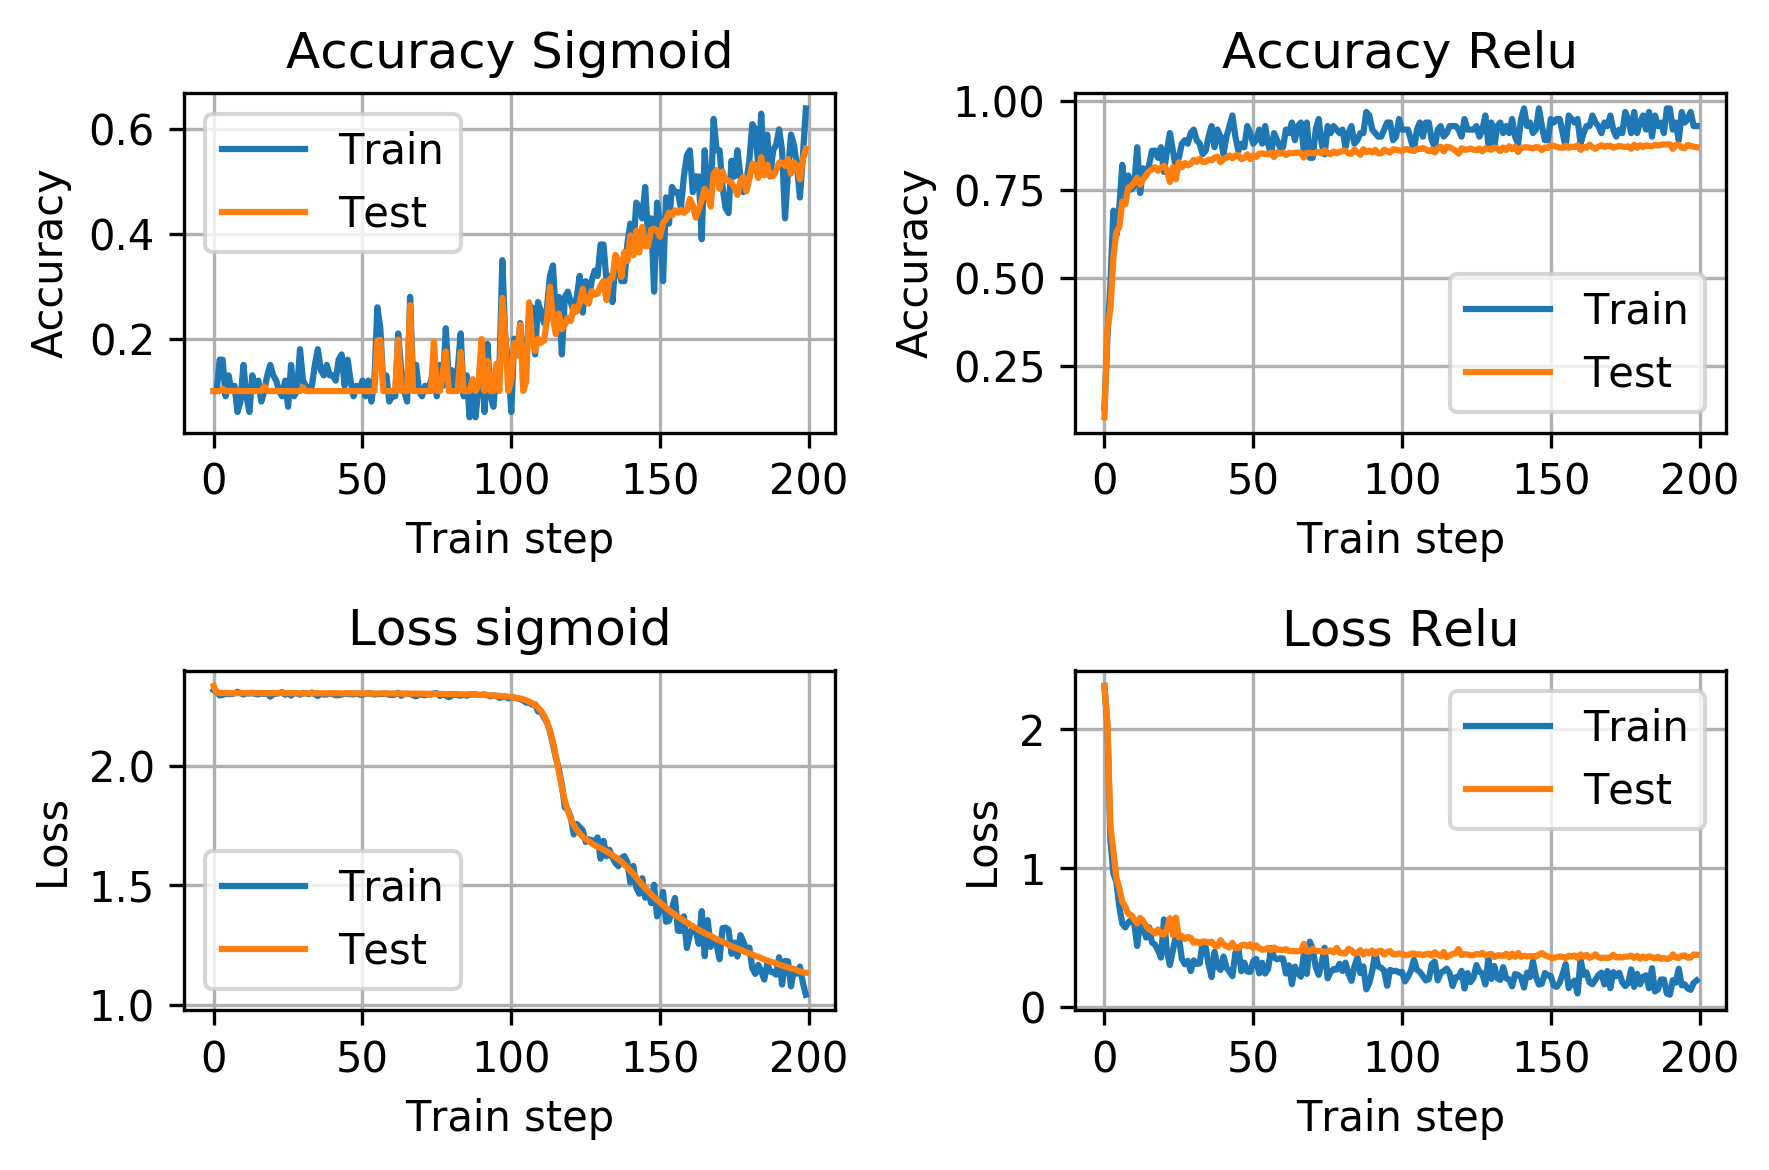

In [41]:
plt.rcParams['figure.dpi']= 300
fig, ax = plt.subplots(nrows=2, ncols=2)

# accuracy training vs testing dataset
plt.subplot(2, 2, 1)
plt.plot(train_a_sig, label='Train')
plt.plot(test_a_sig, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Sigmoid')
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(train_a_relu, label='Train')
plt.plot(test_a_relu, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Relu')
plt.grid(True)



# loss training vs testing dataset
plt.subplot(2, 2, 3)
plt.plot(train_c_sig, label='Train')
plt.plot(test_c_sig, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss sigmoid')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(train_c_relu, label='Train')
plt.plot(test_c_relu, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss Relu')
plt.grid(True)

plt.tight_layout()
plt.show()

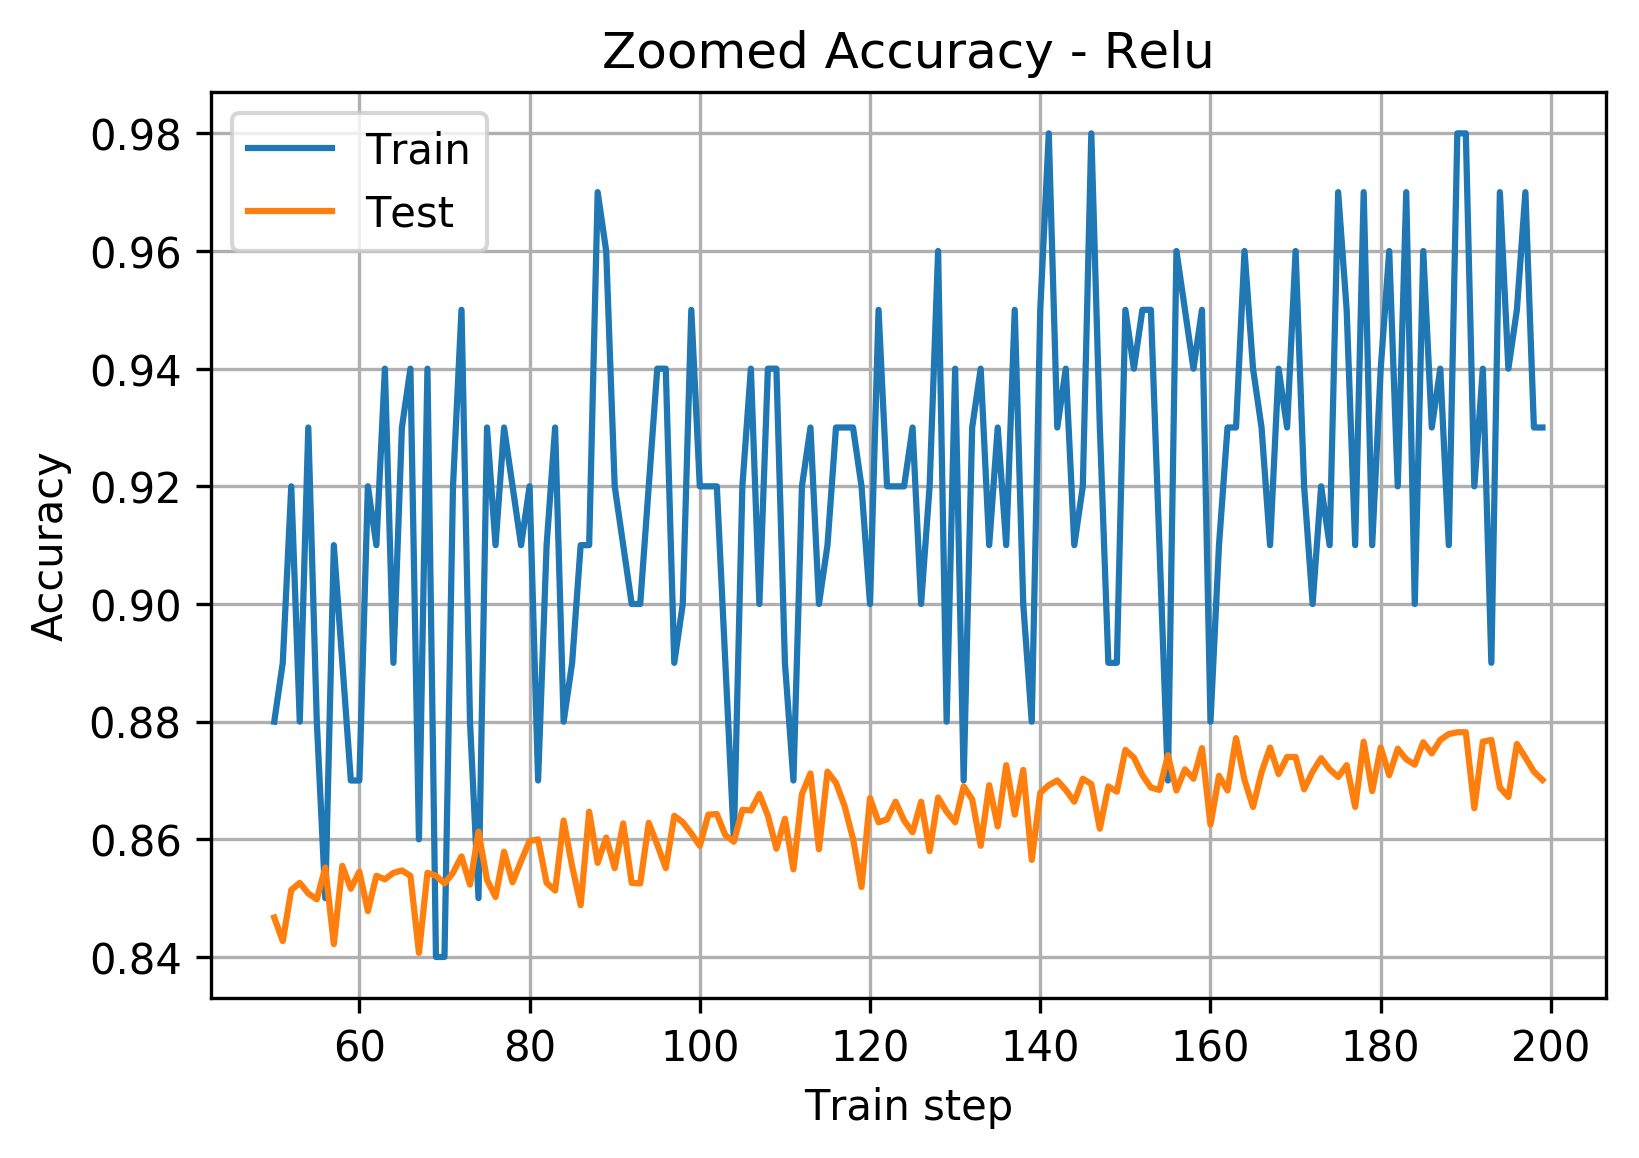

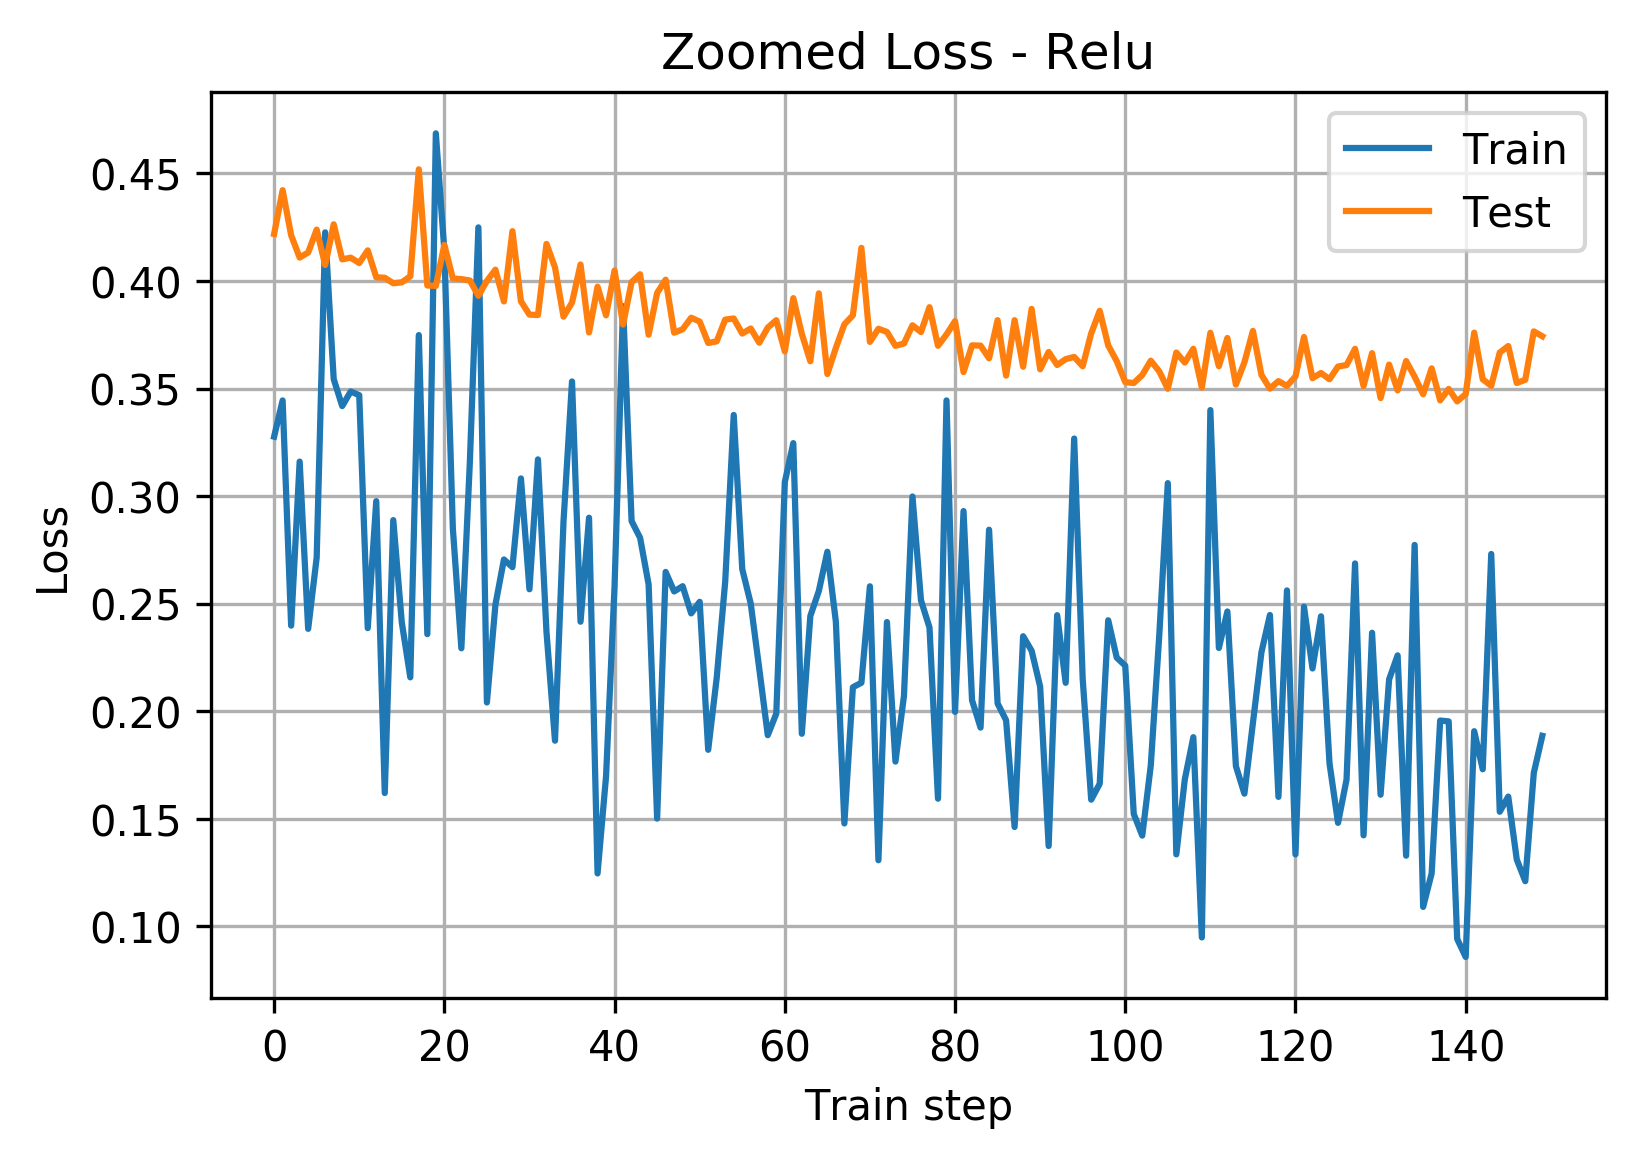

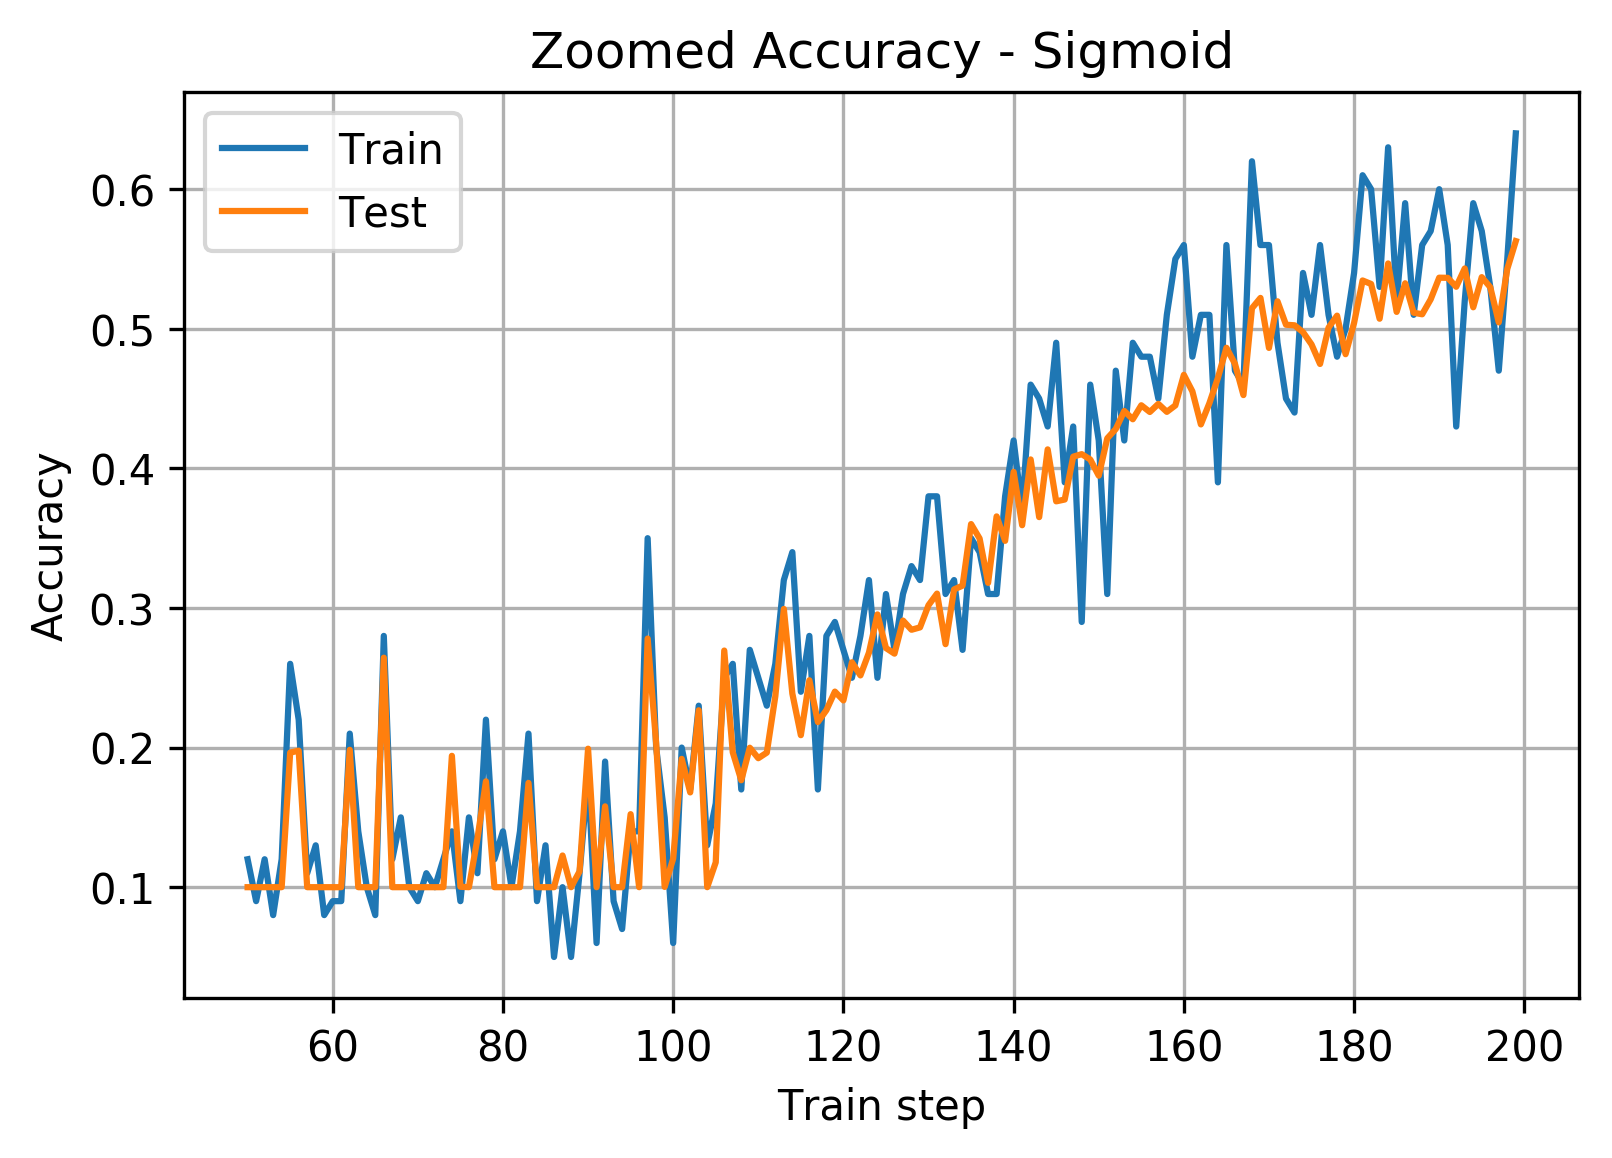

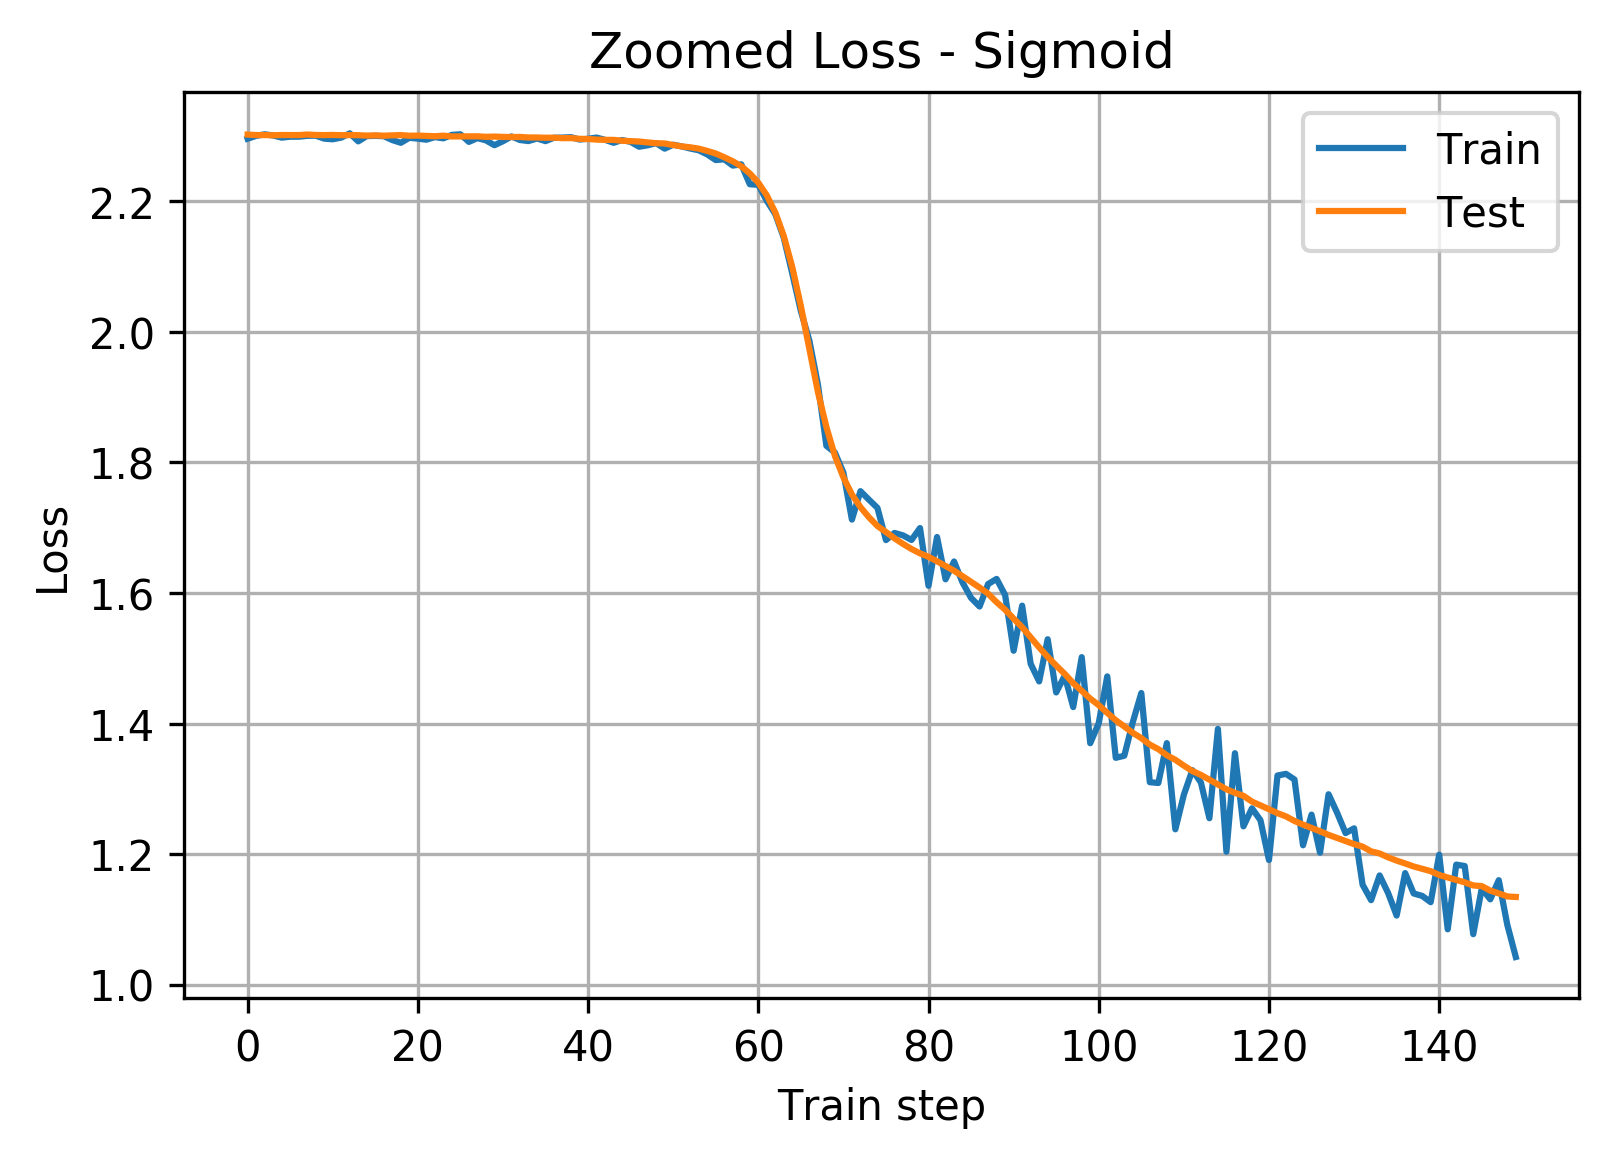

In [54]:
# Zoom in on the tail of the plots
validation_step = 50

zoom_point = 50
x_range = range(zoom_point,training_iter // validation_step)

plt.plot(x_range, train_a_relu[zoom_point:], label='Train')
plt.plot(x_range, test_a_relu[zoom_point:], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Zoomed Accuracy - Relu')
plt.grid(True)
plt.show()

plt.plot(train_c_relu[zoom_point:], label='Train')
plt.plot(test_c_relu[zoom_point:], label='Test')
plt.grid(True)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Zoomed Loss - Relu')
plt.show()


plt.plot(x_range, train_a_sig[zoom_point:], label='Train')
plt.plot(x_range, test_a_sig[zoom_point:], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Zoomed Accuracy - Sigmoid')
plt.grid(True)
plt.show()

plt.plot(train_c_sig[zoom_point:], label='Train')
plt.plot(test_c_sig[zoom_point:], label='Test')
plt.grid(True)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Zoomed Loss - Sigmoid')
plt.show()

# Questions

## 2
 - Yes, there is. Relu converges faster, as it doesn't face vanishing gradient problem (slope~=0).

## 3
 - We want to predict probability that a sample belongs to each class (10 class in this assignment).

## 4
- Normalization, Shuffle



# Task 3

In [65]:
%matplotlib inline

def training_task3(activation_type = 1, pkeep = 0.5, optimizer_type="gradient", starter_learning_rate=0.1):
    if starter_learning_rate !=0:
        global_step = tf.Variable(0, trainable=False)
        learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,100000, 0.96, staircase=True)
    else:
        learning_rate = 0.1
    #Placeholders
    X = tf.placeholder(tf.float32, [None, 784])
    Y_ = tf.placeholder(tf.float32, [None, 10])

    #Variables

    W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
    B1 = tf.Variable(tf.zeros([200]))

    W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
    B2 = tf.Variable(tf.zeros([100]))

    W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
    B3 = tf.Variable(tf.zeros([60]))

    W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
    B4 = tf.Variable(tf.zeros([30]))

    W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
    B5 = tf.Variable(tf.zeros([10]))

    init = tf.global_variables_initializer()

    def relu(x, w, b, pkeep):
        Y = tf.nn.relu(tf.add(tf.matmul(x, w), b))
        return tf.nn.dropout(Y,pkeep)

    def sigmoid(x, w, b, pkeep):
        Y = tf.nn.sigmoid(tf.add(tf.matmul(x, w), b))
        return tf.nn.dropout(Y,pkeep)

    def selectOne(x, w, b, pkeep, flag):
        if flag==1:
            return relu(x,w,b,pkeep)
        else:
            return sigmoid(x,w,b,pkeep)

    def model(activation_type=1):
        #Define the model
        Y1d = selectOne(X,W1,B1,pkeep,activation_type)
        Y2d = selectOne(Y1d,W2,B2,pkeep,activation_type)
        Y3d = selectOne(Y2d,W3,B3,pkeep,activation_type)
        Y4d = selectOne(Y3d,W4,B4,pkeep,activation_type)
        Y = tf.matmul(Y4d,W5)+B5
        
        return Y
    
    Y = model(activation_type=activation_type)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y,labels = Y_))
    #Define the loss function
    # cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
    is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
    # Define an optimizer
    
    if optimizer_type=="gradient":
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_step = optimizer.minimize(cross_entropy)
    else:
        optimizer = tf.train.AdamOptimizer(learning_rate) #Errors TODO
        train_step = optimizer.minimize(cross_entropy)

    # initialize
    sess = tf.Session()
    sess.run(init)


    training_iter = 10000
    validation_step = 100
    print("The number of traninig examples are: " + str(mnist.train.num_examples))

    train_a = []
    train_c = []
    test_a = []
    test_c = []

    for i in tqdm_notebook(range(training_iter)): ##Is it meaningful
        #load batch of images and correct answers
        batch_X, batch_Y = mnist.train.next_batch(batch_size=100)
        #print(batch_Y.dtype) #dtype is 64!!
        train_data={X: batch_X, Y_: batch_Y}

        #train
        sess.run(train_step,feed_dict=train_data)

        if i % validation_step == 0:
            #success
            a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
    #         print("train accuracy is " + str(a))
    #         print("train cost function is " + str(c))
            train_a.append(a)
            train_c.append(c)

            test_data = {X:mnist.test.images, Y_:mnist.test.labels}
            a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
            test_a.append(a)
            test_c.append(c)
            
    return train_a, test_a, train_c, test_c

The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

Exception in thread Thread-72:
Traceback (most recent call last):
  File "/usr/lib64/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/hadi/Dropbox/DeepLearning/env/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/hadi/Dropbox/DeepLearning/env/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




Decay test accuracy is : 0.88
The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


Dropout test accuracy is : 0.7589
The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


Both test accuracy is : 0.7812


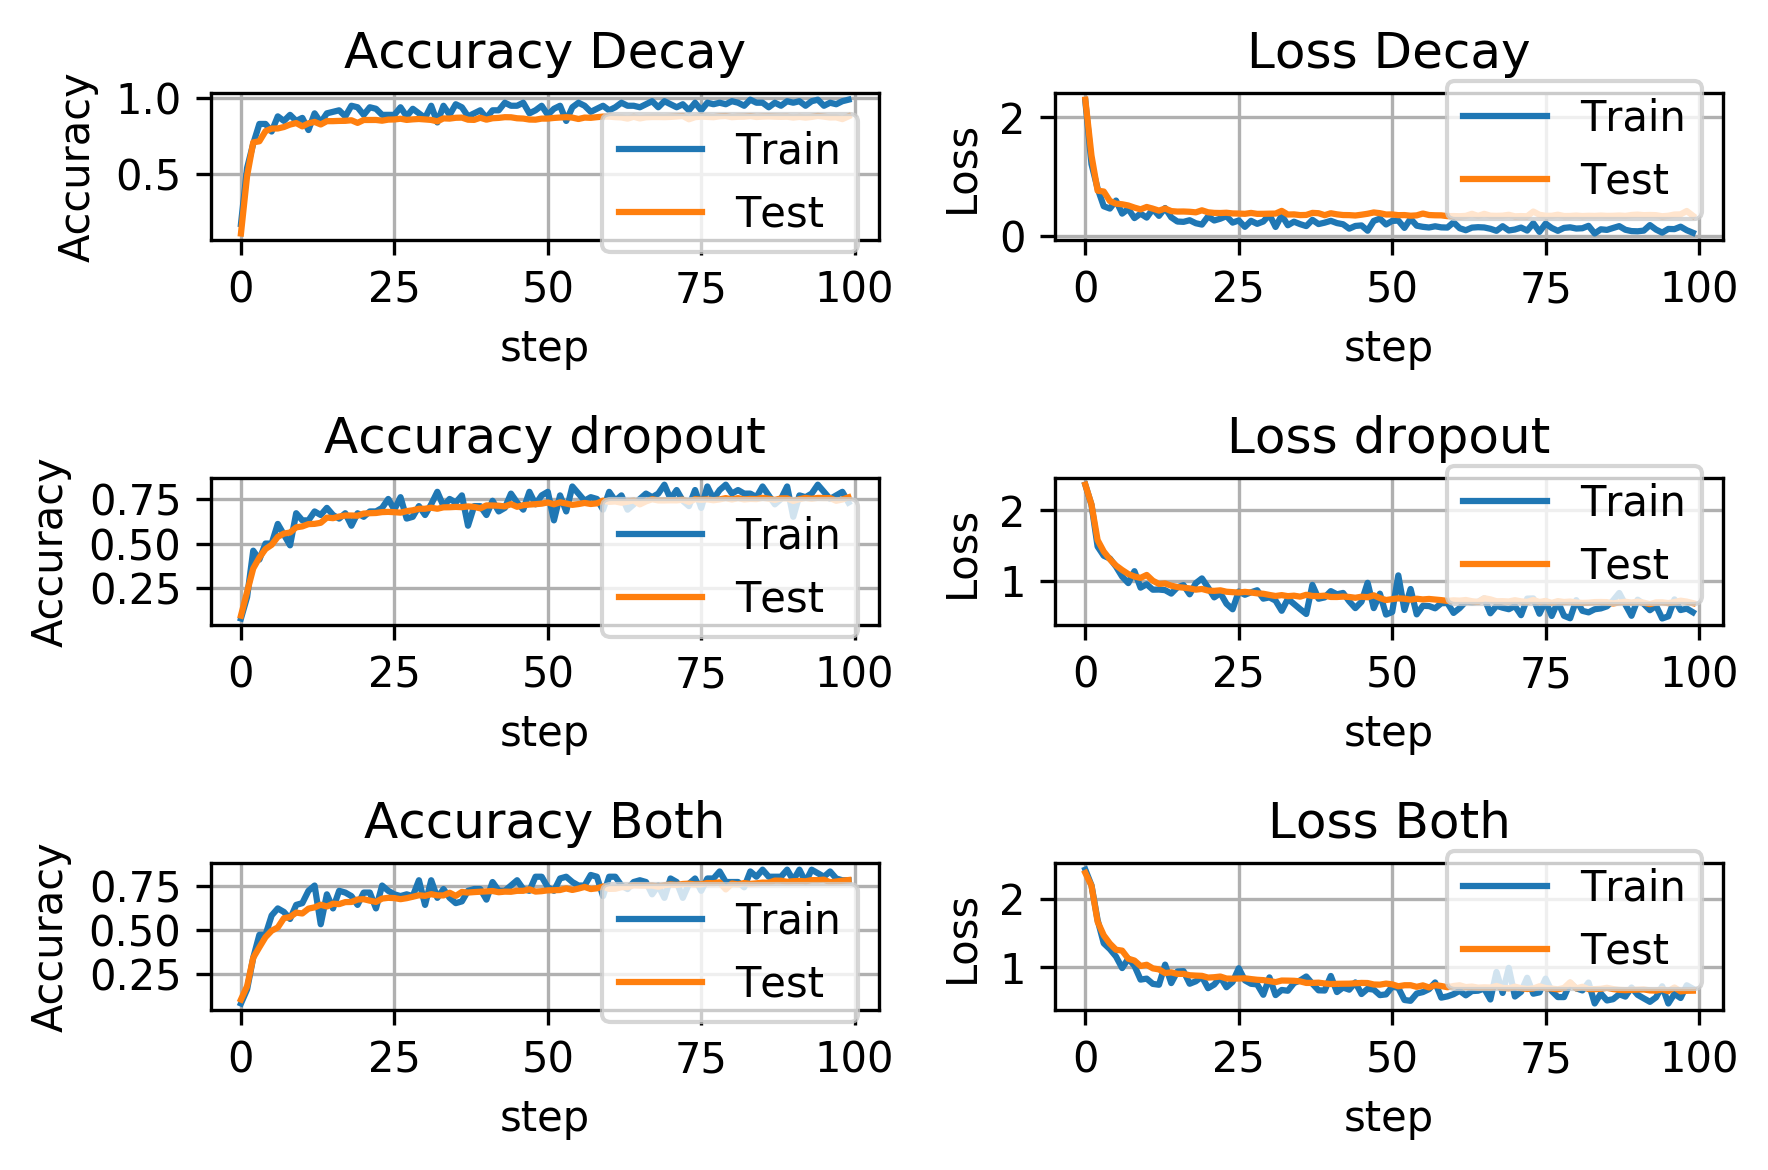

In [66]:
### only decay
train_a_d, test_a_d, train_c_d, test_c_d = training_task3(activation_type=1,pkeep=1.0)

plt.rcParams['figure.dpi']= 300
fig, ax = plt.subplots(nrows=3, ncols=2)

print("Decay test accuracy is : "+str(test_a_d[-1]))
# accuracy training vs testing dataset
plt.subplot(3, 2, 1)
plt.plot(train_a_d, label='Train')
plt.plot(test_a_d, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('step')
plt.title('Accuracy Decay')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(train_c_d, label='Train')
plt.plot(test_c_d, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('step')
plt.title('Loss Decay')
plt.grid(True)

#Only dropout
train_a_dr, test_a_dr, train_c_dr, test_c_dr = training_task3(activation_type=1,starter_learning_rate=0)

print("Dropout test accuracy is : "+str(test_a_dr[-1]))

plt.subplot(3, 2, 3)
plt.plot(train_a_dr, label='Train')
plt.plot(test_a_dr, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('step')
plt.title('Accuracy dropout')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(train_c_dr, label='Train')
plt.plot(test_c_dr, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('step')
plt.title('Loss dropout')
plt.grid(True)

# Both
train_a_b, test_a_b, train_c_b, test_c_b = training_task3(activation_type=1)

print("Both test accuracy is : "+str(test_a_b[-1]))

plt.subplot(3, 2, 5)
plt.plot(train_a_b, label='Train')
plt.plot(test_a_b, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('step')
plt.title('Accuracy Both')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(train_c_b, label='Train')
plt.plot(test_c_b, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('step')
plt.title('Loss Both')
plt.grid(True)

plt.tight_layout()
plt.show()

# Task 4

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import fashion_mnist
from keras import optimizers

batch_size = 100
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255 - 0.5
x_test= x_test/255 - 0.5
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),strides = (1,1),activation='relu',input_shape=input_shape,padding="same",use_bias=True))
model.add(Conv2D(64, kernel_size=(5, 5),strides = (2,2),activation='relu',padding="same"))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(4, 4),strides = (2,2),activation='relu',padding="same"))
model.add(Flatten())
model.add(Dense(200, activation='relu')) #Dense
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #ReadOut

sgd = optimizers.SGD(lr=0.01, decay=1e-6)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
adam_decay = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.2)


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam_decay,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 180s 3ms/step - loss: 0.8951 - acc: 0.6709 - val_loss: 0.6646 - val_acc: 0.7476
Test loss: 0.6645675951
Test accuracy: 0.7476


# with 1 epoch

## SGD optimizer:
   - train accuracy: 0.6363
   - train loss: 1.0348
   - Test accuracy: 0.7541
   - Test loss: 0.677366654205

## Adam(without Decay) optimizer:
   - train accuracy: 0.8453
   - train loss: 0.4325
   - Test accuracy: 0.8815
   - Test loss: 0.8815

## Adam(decay) optimizer:
   - train accuracy: 0.7675
   - train loss: 0.6454
   - Test accuracy: 0.7852
   - Test loss: 0.580862922239

## Adam(Without decay) + dropout : 
   - train accuracy: 0.8008
   - train loss: 0.5550
   - Test accuracy: 0.364547846317
   - Test loss: 0.8652
   
## Adam(decay) + dropout : 
   - train accuracy: 0.6709
   - train loss: 0.8951
   - Test accuracy: 0.7476
   - Test loss: 0.6645675951


# Task 5

In [16]:
from itertools import product

#Create hyperparameter space
learning_rates = [0.5,0.1]
dropouts = [0.5,0.7]
activation_type = [1,0]
max_result = 0
optimizer = None
dropout = 0
starter_learning_rate = 0
activation_function = None
for at,lr,dr in product(activation_type,learning_rates,dropouts):
    train_a, test_a, train_c, test_c = training_task3(activation_type = at, pkeep = dr, starter_learning_rate=lr)
    test_result = test_a[-1]
    if max_result < test_result:
        max_result = test_result
        dropout = dr
        starter_learning_rate = lr
        activation_function = at

print("Max test accuracy is :" + str(max_result))
print("Its drop out is :" + str(dropout))
print("Its starter_learning_rate is :" + str(starter_learning_rate))
print("Its activation function is :" + str(activation_function))

The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


Max test accuracy is :0.8433
Its drop out is :0.7
Its starter_learning_rate is :0.1
Its activation function is :1
